# UZOP Projekt ; Predicting NBA Shots

## Student: Nikola Kraljevc (JMBAG: 1191242964)

___
## Paketi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___
## Analiza ,ciscenje, deskriptivna statistika

### Ucitavanje podataka

In [5]:
# ucitavanje podataka¶
X = pd.read_csv("shot_logs.csv")
X.columns = X.columns.str.lower()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_id                     128069 non-null  int64  
 1   matchup                     128069 non-null  object 
 2   location                    128069 non-null  object 
 3   w                           128069 non-null  object 
 4   final_margin                128069 non-null  int64  
 5   shot_number                 128069 non-null  int64  
 6   period                      128069 non-null  int64  
 7   game_clock                  128069 non-null  object 
 8   shot_clock                  122502 non-null  float64
 9   dribbles                    128069 non-null  int64  
 10  touch_time                  128069 non-null  float64
 11  shot_dist                   128069 non-null  float64
 12  pts_type                    128069 non-null  int64  
 13  shot_result   

### Opis znacajki

In [7]:
X.columns.values

array(['game_id', 'matchup', 'location', 'w', 'final_margin',
       'shot_number', 'period', 'game_clock', 'shot_clock', 'dribbles',
       'touch_time', 'shot_dist', 'pts_type', 'shot_result',
       'closest_defender', 'closest_defender_player_id', 'close_def_dist',
       'fgm', 'pts', 'player_name', 'player_id'], dtype=object)

- game_id: id matcha u kojem je recordan shot
- matchup: datum i imena timova koji su igrali
- location: home ili away
- w: Win ili Loose       
- final_margin: ? razlika u rezultatu                
- shot_number: redni broj bacanja
- period: cetvrt u kojoj je bilo bacanje         
- game_clock: koliko je vremena ostalo u trenutnoj cetvrti
- shot_clock: kolko je vremena ostalo u napadu tima (25s traje napad)
- dribbles:                         
- touch_time: koliko dugo je igrac imao loptu kod sebe prije bacanja u sekundama             
- shot_dist: udaljenost igraca od kosa pri bacanju                      
- pts_type: potencijalni bodovi sa te lokacije      
- shot_result: jeli bacanje bilo pogodak ili promasaj                   
- closest_defender: ime najblizeg igraca iz suparnickog tima koji je branio igraca koji baca   
- closest_defender_player_id: id tog igraca
- close_def_dist: udaljenost tog igraca od igraca koji baca
- fgm: field goals made - binarna varijabla uspjesnosti bacanja
- pts: kolicina bodova koje je tim dobio (osvisi o FGM i PTS_TYPE)
- player_name: ime igraca koji baca
- player_id: id igraca koji baca            

In [8]:
# maknut cemo fgm i pts jer su savrseni predictori shot_result, a to cemo u buducnosti htjet predictat
X = X.drop(columns=["fgm","pts", ], axis=1)

### Monotoni atributi

In [9]:
X.nunique() # Zasto je duplo vise matchupova od game idjeva?

game_id                        904
matchup                       1808
location                         2
w                                2
final_margin                    88
shot_number                     38
period                           7
game_clock                     719
shot_clock                     241
dribbles                        33
touch_time                     313
shot_dist                      448
pts_type                         2
shot_result                      2
closest_defender               473
closest_defender_player_id     474
close_def_dist                 299
player_name                    281
player_id                      281
dtype: int64

game_id, matchup, closest_defender, closest_defender_player_id, player_name, player_id znacajke cu za sada maknuti jer je tako u znanstvenom radu
makuo kategorijske znaccajke sa puno vrijednosti, kasnije cu revisitat ovu odluku.

In [10]:
X = X.drop(columns=["game_id", "matchup", "closest_defender", "closest_defender_player_id", "player_name", "player_id"], axis=1)

### Nedostajući podatci

In [11]:
X.isna().sum()

location             0
w                    0
final_margin         0
shot_number          0
period               0
game_clock           0
shot_clock        5567
dribbles             0
touch_time           0
shot_dist            0
pts_type             0
shot_result          0
close_def_dist       0
dtype: int64

In [12]:
X = X.loc[X.shot_clock.notnull(),:] # Micemo primjere sa null vrijednosti

### Stršeći podatci

In [13]:
X.describe()

,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,4.121706
std,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,2.751587
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,5.300000
max,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,53.200000


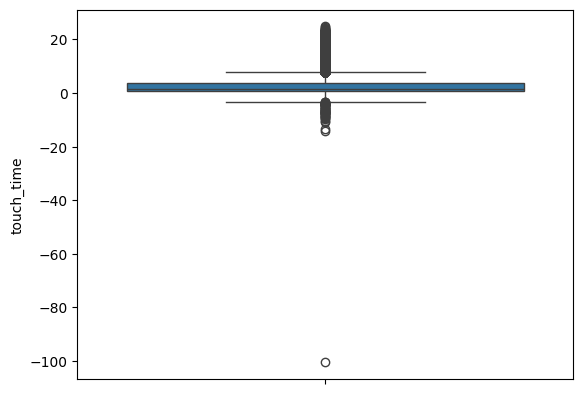

<Axes: ylabel='touch_time'>

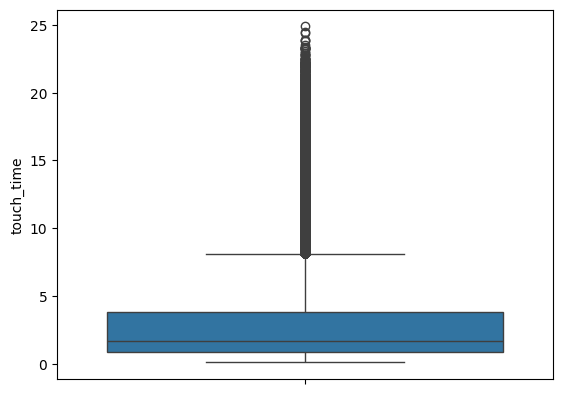

In [12]:
sns.boxplot(X['touch_time']) # Primjecujemo iz tablice da imamo strsece vrijednosit za touch_time
plt.show()
# touch_time je takodjer vremenska varijabla i nema smisla da ima negativnu vrijednost
X = X.loc[(X.touch_time > 0)]
sns.boxplot(X['touch_time'])

In [14]:
outliers = X[(X.touch_time > 10)]
len(outliers)
# ove outliere nema smisla izbacivat

4011

### Matrica dijagrama rasprsenja

In [117]:
# sns.set(rc={'figure.figsize':(25,15)})
# sns.pairplot(X.loc[:,['final_margin', 'shot_number', 'shot_clock', 'dribbles', 'touch_time', 'shot_dist', 'shot_result', 'close_def_dist']], hue="shot_result", corner=True)
# plt.show()

### Finalan pregled dataseta

Text(0, 0.5, 'Total')

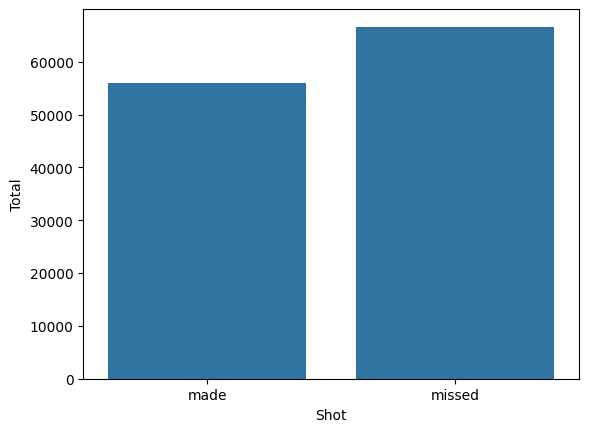

In [15]:
ax = sns.countplot(x="shot_result", data=X)
ax.set_xlabel("Shot")
ax.set_ylabel("Total")

In [119]:
X.describe()

,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,119386.000000,119386.000000,119386.000000,119386.00000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.257945,6.471027,2.471111,12.32351,2.041094,2.824904,13.614446,2.263012,4.145090
std,13.312160,4.682672,1.138258,5.66551,3.440073,2.938674,8.738203,0.440271,2.741207
min,-53.000000,1.000000,1.000000,0.00000,0.000000,0.100000,0.000000,2.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.10000,0.000000,0.900000,4.900000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.20000,1.000000,1.700000,13.900000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.40000,3.000000,3.800000,22.500000,3.000000,5.300000
max,53.000000,37.000000,7.000000,24.00000,32.000000,24.900000,43.300000,3.000000,53.200000


In [16]:
X

,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,close_def_dist
0,A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,6.1
3,A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,1.1
5,A,W,24,6,2,8:15,9.1,2,4.4,18.4,2,missed,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,A,L,-16,4,2,5:05,15.3,2,1.6,8.9,2,made,5.7
128064,A,L,-16,5,3,1:52,18.3,5,6.2,8.7,2,missed,0.8
128065,A,L,-16,6,4,11:28,19.8,4,5.2,0.6,2,made,0.6
128066,A,L,-16,7,4,11:10,23.0,2,4.2,16.9,2,made,4.2


___
## Replikacija rezultata

### Dodatno ciscenje za game_clock

In [22]:
X['game_clock'] = X['game_clock'].apply(lambda x: 60*int(x.split(':')[0]) + int(x.split(':')[1]))

In [16]:
X.describe()

,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.00000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.257945,6.471027,2.471111,361.350477,12.32351,2.041094,2.824904,13.614446,2.263012,4.145090
std,13.312160,4.682672,1.138258,202.098139,5.66551,3.440073,2.938674,8.738203,0.440271,2.741207
min,-53.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.100000,0.000000,2.000000,0.000000
25%,-8.000000,3.000000,1.000000,188.000000,8.10000,0.000000,0.900000,4.900000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,362.000000,12.20000,1.000000,1.700000,13.900000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,536.000000,16.40000,3.000000,3.800000,22.500000,3.000000,5.300000
max,53.000000,37.000000,7.000000,720.000000,24.00000,32.000000,24.900000,43.300000,3.000000,53.200000


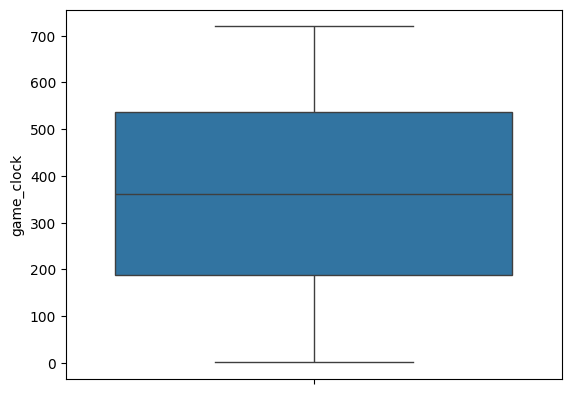

In [17]:
sns.boxplot(X['game_clock'])
plt.show()

___
### Logisticka regresija

#### Dodatno ciscenje

In [38]:
from sklearn.preprocessing import StandardScaler

X_lr = X.copy()

X_lr['shot_result'] = X['shot_result'].apply(lambda x : 1 if x == "made" else 0 )
# micemo sve sto nije dostupno u trenutku bacanja
y_lr = X_lr["shot_result"].to_numpy()
X_lr = X_lr.drop(columns=["location","w","final_margin","shot_result"], axis=1)
X_lr.describe()

,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,6.476164,2.471454,361.068529,12.453344,1.989233,2.748202,13.443758,2.258363,4.121706
std,4.681245,1.137898,202.024393,5.763265,3.411188,2.957237,8.777113,0.437736,2.751587
min,1.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000
25%,3.000000,1.000000,187.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,5.000000,2.000000,362.000000,12.300000,1.000000,1.600000,13.400000,2.000000,3.700000
75%,9.000000,3.000000,536.000000,16.675000,2.000000,3.700000,22.400000,3.000000,5.300000
max,37.000000,7.000000,720.000000,24.000000,32.000000,24.900000,43.500000,3.000000,53.200000


#### Treniranje

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# standardizacija
scaler = StandardScaler()
scaler.fit(X_lr)
X_lr = scaler.transform(X_lr)

# train test split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, stratify=y_lr) # test_size = .25 po defaultu

# treniranje
clf = LogisticRegression(C=1000)
clf.fit(X_lr_train, y_lr_train)

# rezultati
predictions = clf.predict(X_lr_test)
print(f'accuracy: {accuracy_score(y_lr_test, predictions)}')
print(confusion_matrix(y_lr_test, predictions))

accuracy: 0.6066414157905048
[[11888  4768]
 [ 7279  6691]]


___
### SVM

In [40]:
X_svm = X.copy()
X_svm['shot_result'] = X['shot_result'].apply(lambda x : 1 if x == "made" else 0 )
# micemo sve sto nije dostupno u trenutku bacanja
y_svm = X_svm["shot_result"].to_numpy()
X_svm = X_svm.drop(columns=["location","w","final_margin","shot_result"], axis=1)

In [41]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, stratify=y_svm)

clf = make_pipeline(StandardScaler(),LinearSVC(dual=False, random_state=0, tol=1e-5))
clf.fit(X_svm_train, y_svm_train)

predictions = clf.predict(X_svm_test)

In [42]:
print(f'accuracy: {accuracy_score(y_svm_test, predictions)}')
print(confusion_matrix(y_svm_test, predictions))

accuracy: 0.6078495396068699
[[12030  4626]
 [ 7384  6586]]


___
### Neuralne mreze

#### Dodatno ciscenje

In [43]:
from sklearn.preprocessing import StandardScaler

X_nn = X.copy()

X_nn['shot_result'] = X['shot_result'].apply(lambda x : 1 if x == "made" else 0 )
# micemo sve sto nije dostupno u trenutku bacanja
y_nn = X_nn["shot_result"].to_numpy()
X_nn = X_nn.drop(columns=["location","w","final_margin","shot_result"], axis=1)
X_nn.describe()

,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,6.476164,2.471454,361.068529,12.453344,1.989233,2.748202,13.443758,2.258363,4.121706
std,4.681245,1.137898,202.024393,5.763265,3.411188,2.957237,8.777113,0.437736,2.751587
min,1.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000
25%,3.000000,1.000000,187.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,5.000000,2.000000,362.000000,12.300000,1.000000,1.600000,13.400000,2.000000,3.700000
75%,9.000000,3.000000,536.000000,16.675000,2.000000,3.700000,22.400000,3.000000,5.300000
max,37.000000,7.000000,720.000000,24.000000,32.000000,24.900000,43.500000,3.000000,53.200000


#### Treniranje

In [44]:
# standardizacija
scaler = StandardScaler()
scaler.fit(X_nn)
X_nn = scaler.transform(X_nn)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

relu_scores = np.array([])
sigmoid_scores = np.array([])


#for i in range(20):
# stratify osigurava da su relativne frekvencije ciljnih varijabli slicne u trainu i u testu!
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, stratify=y_nn) # test_size = .25 po defaultu

# default alpha je 0.0001 koji je i koristen u radu!
clf_relu = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[50], alpha=0.001).fit(X_nn_train, y_nn_train) # RELU aktivacijska funkcija!
clf_sigmoid = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[50], activation="logistic", alpha=0.001).fit(X_nn_train, y_nn_train) # RELU aktivacijska funkcija!

relu_scores = np.append(relu_scores, clf_relu.score(X_nn_test, y_nn_test))
sigmoid_scores = np.append(sigmoid_scores, clf_sigmoid.score(X_nn_test, y_nn_test))

In [46]:
print(f"relu_scores average: {np.average(relu_scores)}")
print(f"sigmoid_scores average: {np.average(sigmoid_scores)}")

relu_scores average: 0.6155554104355776
sigmoid_scores average: 0.6128452948475152


In [47]:
from sklearn.metrics import confusion_matrix

X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, stratify=y_nn, test_size=0.1) # test_size = .25 po defaultu
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[50], activation="logistic").fit(X_nn_train, y_nn_train) # RELU aktivacijska funkcija!
y_nn_pred = clf.predict(X_nn_test)
print(confusion_matrix(y_nn_test,y_nn_pred))
print(clf.score(X_nn_test, y_nn_test))

[[5492 1171]
 [3546 2042]]
0.614970206513754


___
### Naivni bayes

#### Dodatno ciscenje (binning)

In [48]:
X_bayes = X.copy()

X_bayes['shot_result'] = X['shot_result'].apply(lambda x : 1 if x == "made" else 0 )
# micemo sve sto nije dostupno u trenutku bacanja
y_bayes = X_bayes["shot_result"].to_numpy()
X_bayes = X_bayes.drop(columns=["location","w","final_margin","shot_result"], axis=1)
X_bayes.describe()

,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,6.476164,2.471454,361.068529,12.453344,1.989233,2.748202,13.443758,2.258363,4.121706
std,4.681245,1.137898,202.024393,5.763265,3.411188,2.957237,8.777113,0.437736,2.751587
min,1.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000
25%,3.000000,1.000000,187.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,5.000000,2.000000,362.000000,12.300000,1.000000,1.600000,13.400000,2.000000,3.700000
75%,9.000000,3.000000,536.000000,16.675000,2.000000,3.700000,22.400000,3.000000,5.300000
max,37.000000,7.000000,720.000000,24.000000,32.000000,24.900000,43.500000,3.000000,53.200000


In [49]:
X_bayes

,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
0,1,1,69,10.8,2,1.9,7.7,2,1.3
1,2,1,14,3.4,0,0.8,28.2,3,6.1
3,4,2,707,10.3,2,1.9,17.2,2,3.4
4,5,2,634,10.9,2,2.7,3.7,2,1.1
5,6,2,495,9.1,2,4.4,18.4,2,2.6
...,...,...,...,...,...,...,...,...,...
128063,4,2,305,15.3,2,1.6,8.9,2,5.7
128064,5,3,112,18.3,5,6.2,8.7,2,0.8
128065,6,4,688,19.8,4,5.2,0.6,2,0.6
128066,7,4,670,23.0,2,4.2,16.9,2,4.2


#### Treniranje

In [50]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None)
est.fit(X_bayes.to_numpy())
X_bayes = est.transform(X_bayes.to_numpy())
X_bayes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 3., 4., 0.],
       [0., 0., 4., ..., 1., 0., 0.],
       ...,
       [0., 2., 4., ..., 0., 0., 0.],
       [0., 2., 4., ..., 1., 0., 0.],
       [0., 2., 1., ..., 2., 0., 0.]])

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score

X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(X_bayes, y_bayes, stratify=y_bayes, test_size=0.5)
clf = MultinomialNB(alpha=1.0)
clf.fit(X_bayes_train, y_bayes_train)
predictions = clf.predict(X_bayes_test)
print(f'accuracy: {accuracy_score(y_bayes_test, predictions)}')
print(confusion_matrix(y_bayes_test, predictions))

accuracy: 0.5681866418507453
[[16704 16607]
 [ 9842 18098]]


___
### Random forests

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.preprocessing import StandardScaler

X_rf = X.copy()
X_rf['shot_result'] = X['shot_result'].apply(lambda x : 1 if x == "made" else 0 )
y_rf = X_rf["shot_result"].to_numpy()
X_rf = X_rf.drop(columns=["location","w","final_margin","shot_result"], axis=1)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(X_rf_train, y_rf_train)

predictions = rf.predict(X_rf_test)

accuracy = accuracy_score(y_rf_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5977524421104188


In [24]:
print(confusion_matrix(y_rf_test, predictions))

[[15114  4941]
 [ 9850  6846]]


___
### XGBoost

In [129]:
X_boost = X.copy()

X_boost['shot_result'] = X_boost['shot_result'].apply(lambda x : 1 if x == "made" else 0 )
# micemo sve sto nije dostupno u trenutku bacanja
y_boost = X_boost["shot_result"].to_numpy()
X_boost = X_boost.drop(columns=["final_margin", "shot_number", "period" , "game_clock", "dribbles", "pts_type", "w", "location", "shot_result"], axis=1)
X_boost # sa 4 najbitnije znacajke

,shot_clock,touch_time,shot_dist,close_def_dist
0,10.8,1.9,7.7,1.3
1,3.4,0.8,28.2,6.1
3,10.3,1.9,17.2,3.4
4,10.9,2.7,3.7,1.1
5,9.1,4.4,18.4,2.6
...,...,...,...,...
128063,15.3,1.6,8.9,5.7
128064,18.3,6.2,8.7,0.8
128065,19.8,5.2,0.6,0.6
128066,23.0,4.2,16.9,4.2


In [130]:
X_boost.describe()

,shot_clock,touch_time,shot_dist,close_def_dist
count,119386.00000,119386.000000,119386.000000,119386.000000
mean,12.32351,2.824904,13.614446,4.145090
std,5.66551,2.938674,8.738203,2.741207
min,0.00000,0.100000,0.000000,0.000000
25%,8.10000,0.900000,4.900000,2.300000
50%,12.20000,1.700000,13.900000,3.700000
75%,16.40000,3.800000,22.500000,5.300000
max,24.00000,24.900000,43.300000,53.200000


In [164]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score

# https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn
# https://www.kaggle.com/code/pablocastilla/predict-if-a-shot-is-made

X_boost_train, X_boost_test, y_boost_train, y_boost_test = train_test_split(X_boost, y_boost, stratify=y_boost, test_size=0.1)

xgb_model = XGBClassifier(objective="binary:logistic").fit(X_boost_train, y_boost_train)

y_pred_test = xgb_model.predict(X_boost_test)

print(confusion_matrix(y_boost_test, y_pred_test))
print(precision_score(y_boost_test, y_pred_test))

[[5362 1135]
 [3461 1981]]
0.6357509627727856


#### Optimizacija hiperparametara da dodjemo blize 68%

##### Grid search

In [165]:
from sklearn.model_selection import GridSearchCV

X_boost_train, X_boost_test, y_boost_train, y_boost_test = train_test_split(X_boost, y_boost, stratify=y_boost, test_size=0.5)
X_boost_validation, X_boost_test, y_boost_validation, y_boost_test = train_test_split( X_boost_test, y_boost_test, test_size=0.50, random_state=42)

parameters_for_testing = {
    'min_child_weight':[0.0001,0.001,0.01],
    'eta':[0.00001,0.0001,0.001],
    'n_estimators':[1,3,5,10],
    'max_depth':[3,4]
}

xgb_model = XGBClassifier(objective="binary:logistic")

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, scoring='accuracy')
gsearch1.fit(X_boost_train, y_boost_train)

print(f'best params {gsearch1.best_params_}')
print(f'best score {gsearch1.best_score_}')

best params {'eta': 1e-05, 'max_depth': 3, 'min_child_weight': 0.0001, 'n_estimators': 1}
best score 0.5441509052600004


In [189]:
X_boost_train, X_boost_test, y_boost_train, y_boost_test = train_test_split(X_boost, y_boost, stratify=y_boost, test_size=0.3)

xgb_model = XGBClassifier(objective="binary:logistic",
    min_child_weight=0.0001,
    learning_rate=1,       
    n_estimators=1,
    max_depth=3).fit(X_boost_train, y_boost_train)

y_pred_test = xgb_model.predict(X_boost_test)

print(confusion_matrix(y_boost_test, y_pred_test))
print(precision_score(y_boost_test, y_pred_test))

[[17671  1819]
 [12256  4070]]
0.6911190354898964
